# Setup

In [1]:
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import seaborn as sns 
import sklearn
from sklearn import datasets

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


# Data

In [3]:
NB_DIR = Path.cwd()
DATA = NB_DIR/'data'
DATA.mkdir(exist_ok=True)

Vi bruker datasettet fra innlevering 1:

In [4]:
if colab:
    df = pd.read_csv('https://www.dropbox.com/s/ctlniradiv1i5id/assignment1-train.csv?dl=1')

In [5]:
if not colab:
    df = pd.read_csv(DATA/'assignment1-train.csv')

# Imputering

> Hvordan håndtere manglende verdier? 

1. Først må de **detekteres**. I praksis kan manglende verdier være kodet på omtrent hvilken som helst måte. Ofte bruker man blanke verdier, placeholder-verdier (f.eks. -1) eller NaNs (not-a-number).

2. Deretter kan man _imputere_. Det vil si, fylle inn manglende data

Historien vi skal fortelle om dette har behov for at vi er i en maskinlærings-situasjon med X, y og trenings- og test-data:

In [6]:
X, y = df.drop('target', axis=1), df.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 1. Detektere manglende verdier

Det første man typisk undersøker er hvorvidt det er NaN-verdier i datasettet. Hvis en arbeider med en Pandas dataframe er dette enkelt: 

In [11]:
X_train.head(10)

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
87752,62932,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
129455,197598,0.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105501,61192,3.0,5.0,27.0,1.0,2.0,2.0,0.0,0.0,0.0,...,19.0,3.0,36.0,1.0,0.0,5.0,30.0,1.0,47.0,0.0
64821,96901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0
107862,58250,0.0,1.0,5.0,1.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,0.0,8.0,0.0,0.0
52167,110005,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
145130,44627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
125363,36939,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
50339,17491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52427,29088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [12]:
X_train.isna()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
87752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105501,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
107862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
127042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
X_train.isna().sum()

id         0
f_0     2218
f_1     1141
f_2      579
f_3      561
        ... 
f_70    1130
f_71    2242
f_72    2255
f_73    1135
f_74    1120
Length: 76, dtype: int64

In [14]:
# For å tvinge Pandas til å vise alle radene i datasettet: 
with pd.option_context('display.max_rows', None): 
    print(X_train.isna().sum())

id         0
f_0     2218
f_1     1141
f_2      579
f_3      561
f_4     1128
f_5      562
f_6     2218
f_7     2230
f_8      567
f_9     1124
f_10    1147
f_11    1159
f_12    1126
f_13    1158
f_14     570
f_15    2249
f_16     567
f_17    1138
f_18    1134
f_19    1126
f_20    1120
f_21    2238
f_22    1143
f_23    2213
f_24     585
f_25     555
f_26    2250
f_27     574
f_28    1141
f_29    2235
f_30    1106
f_31    1089
f_32    1066
f_33    2265
f_34    1129
f_35     576
f_36    1118
f_37    1119
f_38    1122
f_39     584
f_40     564
f_41    2270
f_42    1125
f_43     572
f_44    2251
f_45     568
f_46    2242
f_47    2251
f_48    1162
f_49    2250
f_50    2285
f_51    2247
f_52     557
f_53    2273
f_54     564
f_55    2238
f_56     547
f_57    1144
f_58    1102
f_59    2251
f_60     578
f_61    1143
f_62    2269
f_63    2255
f_64    1119
f_65     567
f_66    2262
f_67     566
f_68    1142
f_69     586
f_70    1130
f_71    2242
f_72    2255
f_73    1135
f_74    1120
dtype: int64

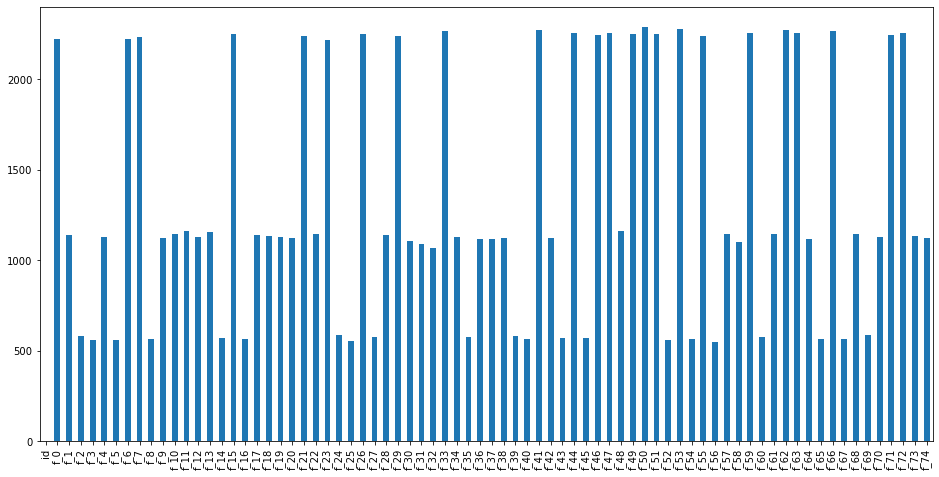

In [15]:
plt.figure(figsize=(16,8))
X_train.isna().sum().plot(kind='bar')
plt.show()

Men manglende verdier kan være kodet annerledes. En måte å finne disse er å se på hvilke verdier som finnes i datasettet. 

I vårt tilfelle er alle features kodet som flyt-tall. Altså kan manglende verdier ikke være reprentert som strenger (f.eks. som tomme strenger " "):

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112500 entries, 87752 to 84054
Data columns (total 76 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      112500 non-null  int64  
 1   f_0     110282 non-null  float64
 2   f_1     111359 non-null  float64
 3   f_2     111921 non-null  float64
 4   f_3     111939 non-null  float64
 5   f_4     111372 non-null  float64
 6   f_5     111938 non-null  float64
 7   f_6     110282 non-null  float64
 8   f_7     110270 non-null  float64
 9   f_8     111933 non-null  float64
 10  f_9     111376 non-null  float64
 11  f_10    111353 non-null  float64
 12  f_11    111341 non-null  float64
 13  f_12    111374 non-null  float64
 14  f_13    111342 non-null  float64
 15  f_14    111930 non-null  float64
 16  f_15    110251 non-null  float64
 17  f_16    111933 non-null  float64
 18  f_17    111362 non-null  float64
 19  f_18    111366 non-null  float64
 20  f_19    111374 non-null  float64
 21  f_20   

Hvis features ikke har for mange ulike verdier er det nyttig å telle opp antall instanser som har hver verdi:

In [17]:
X_train['f_0'].value_counts()

0.0     80712
1.0     13425
2.0      5580
3.0      3685
4.0      2027
5.0      1713
6.0       987
7.0       400
8.0       195
29.0       83
34.0       83
20.0       79
32.0       77
40.0       63
9.0        61
37.0       55
42.0       53
12.0       51
56.0       50
61.0       49
48.0       48
24.0       47
47.0       47
15.0       46
30.0       45
27.0       42
16.0       42
39.0       42
22.0       41
25.0       40
31.0       40
43.0       40
14.0       40
11.0       39
13.0       39
19.0       35
10.0       34
21.0       34
26.0       31
23.0       30
17.0       28
28.0       24
Name: f_0, dtype: int64

In [18]:
for feature in X_train.columns[1:]:   # Vi tar ikke med id-søylen
    print(f"Value count for {feature}")
    with pd.option_context('display.max_rows', None): 
        print(X_train[feature].value_counts())
    print("#"*40)

Value count for f_0
0.0     80712
1.0     13425
2.0      5580
3.0      3685
4.0      2027
5.0      1713
6.0       987
7.0       400
8.0       195
29.0       83
34.0       83
20.0       79
32.0       77
40.0       63
9.0        61
37.0       55
42.0       53
12.0       51
56.0       50
61.0       49
48.0       48
24.0       47
47.0       47
15.0       46
30.0       45
27.0       42
16.0       42
39.0       42
22.0       41
25.0       40
31.0       40
43.0       40
14.0       40
11.0       39
13.0       39
19.0       35
10.0       34
21.0       34
26.0       31
23.0       30
17.0       28
28.0       24
Name: f_0, dtype: int64
########################################
Value count for f_1
0.0     78096
1.0     15475
2.0      6213
3.0      2918
4.0      2383
6.0      1044
5.0       826
7.0       504
10.0      445
8.0       424
12.0      393
9.0       341
14.0      229
11.0      220
15.0      115
13.0      112
37.0       90
27.0       90
26.0       90
41.0       88
22.0       87
30.0       87

Name: f_62, dtype: int64
########################################
Value count for f_63
0.0     84114
1.0     13383
2.0      5467
3.0      1980
4.0      1239
5.0       474
6.0       352
7.0       169
14.0      136
9.0        83
10.0       82
71.0       79
32.0       75
56.0       75
64.0       67
47.0       67
26.0       60
46.0       59
51.0       58
57.0       58
37.0       58
53.0       57
67.0       57
35.0       56
45.0       56
41.0       56
48.0       56
44.0       56
54.0       55
40.0       54
50.0       54
38.0       53
66.0       53
17.0       52
29.0       52
59.0       52
12.0       51
55.0       50
18.0       49
42.0       49
27.0       49
39.0       48
34.0       48
36.0       47
21.0       47
28.0       46
62.0       45
30.0       42
49.0       42
25.0       41
16.0       41
24.0       41
65.0       41
19.0       39
78.0       38
33.0       38
23.0       37
22.0       37
68.0       33
58.0       33
13.0       32
31.0       32
20.0       30
15.0       30
43.0       27
11.

Det ser i vårt tilfelle ut som at alle manglende verdier er kodet som NaN-verdier. 

## 2. Imputere

Det neste blir å erstatte disse NaN-verdiene. Som vi har sett på er det mange ulike strategier. 

### Enkle strategier

Vi starter med noen enkle strategier: erstatte verdiene ved å bruke gjennomsnitt, median eller den hyppigste verdien

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
?SimpleImputer

In [21]:
imp = SimpleImputer(strategy='mean')

Merk at man kan bruke samme strategi for hver feature, eller ulike strategier for ulike features:

Her er samme strategi brukt for alle features:

In [22]:
X_train_imputed = imp.fit_transform(X_train)

In [23]:
X_train.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
87752,62932,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
129455,197598,0.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105501,61192,3.0,5.0,27.0,1.0,2.0,2.0,0.0,0.0,0.0,...,19.0,3.0,36.0,1.0,0.0,5.0,30.0,1.0,47.0,0.0
64821,96901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0
107862,58250,0.0,1.0,5.0,1.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,0.0,8.0,0.0,0.0


In [24]:
# Reprenter som en dataframe:
X_train_imputed = pd.DataFrame(data=X_train_imputed, columns=X_train.columns)

In [25]:
X_train_imputed.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
0,62932.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.000000,0.0,0.0
1,197598.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,61192.0,3.0,5.0,27.0,1.0,2.0,2.0,0.0,0.0,0.0,...,19.0,3.0,36.0,1.0,0.0,5.0,30.0,1.000000,47.0,0.0
3,96901.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.272656,0.0,0.0
4,58250.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,0.0,8.000000,0.0,0.0


In [26]:
with pd.option_context('display.max_rows', None):
    print(X_train_imputed.isna().sum())

id      0
f_0     0
f_1     0
f_2     0
f_3     0
f_4     0
f_5     0
f_6     0
f_7     0
f_8     0
f_9     0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
f_29    0
f_30    0
f_31    0
f_32    0
f_33    0
f_34    0
f_35    0
f_36    0
f_37    0
f_38    0
f_39    0
f_40    0
f_41    0
f_42    0
f_43    0
f_44    0
f_45    0
f_46    0
f_47    0
f_48    0
f_49    0
f_50    0
f_51    0
f_52    0
f_53    0
f_54    0
f_55    0
f_56    0
f_57    0
f_58    0
f_59    0
f_60    0
f_61    0
f_62    0
f_63    0
f_64    0
f_65    0
f_66    0
f_67    0
f_68    0
f_69    0
f_70    0
f_71    0
f_72    0
f_73    0
f_74    0
dtype: int64


Her er feature-spesifikke strategier per feature:

In [27]:
# Vi lager en kopi slik at vi enkelt kan reversere operasjonen:
X_train_copy = X_train.copy()

In [28]:
features = ['f_0', 'f_1']
imp = SimpleImputer(strategy='mean')
# Transformer de valgte features:
X_train_imp = imp.fit_transform(X_train_copy[features])
# Erstatt søylene med de nye verdiene
X_train_copy[features] = X_train_imp

In [29]:
features = ['f_6', 'f_7']
imp = SimpleImputer(strategy='median')
# Transformer de valgte features:
X_train_imp = imp.fit_transform(X_train_copy[features])
# Erstatt søylene med de nye verdiene
X_train_copy[features] = X_train_imp

In [30]:
features = ['f_8']
imp = SimpleImputer(strategy='most_frequent')
# Transformer de valgte features:
X_train_imp = imp.fit_transform(X_train_copy[features])
# Erstatt søylene med de nye verdiene
X_train_copy[features] = X_train_imp

In [31]:
X_train[40:80]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.0,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.0,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.0,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


In [32]:
X_train_copy[40:80]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.000000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.000000,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.000000,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.000000,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.000000,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.000000,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


### Mer avanserte strategier

En kan være mer spissfindig enn å imputere verdier ved å bruke verdiene til alle instanser. Man kan for eksempel finne hvilke verdier en skal erstatte med ved å bruke kun _lignende_ instanser, istedenfor alle. 

En strategi for dette er å trene en modell som kan gruppere lignende instanser. Et eksempel på dette er såkalte **K nærmeste nabo** eller KNN.  

<img width=60% src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/850px-KnnClassification.svg.png'>

In [33]:
from sklearn.impute import KNNImputer

In [34]:
?KNNImputer

In [35]:
knn_imp = KNNImputer()

Det tar en stund å trene modellen så vi bruker den her kun på to features:

In [36]:
X_train_copy = X_train.copy()

In [37]:
X_train[40:50]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.0,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.0,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.0,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


In [38]:
features = ['f_0', 'f_1']
imp = KNNImputer()
# Transformer de valgte features:
X_train_imp = imp.fit_transform(X_train_copy[features])
# Erstatt søylene med de nye verdiene
X_train_copy[features] = X_train_imp

In [39]:
X_train_copy[40:50]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.0,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.0,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.0,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


### En annen strategi: tren en modell til å imputere

En annen strategi er å trene en regresjonsmodell, for eksempel en RandomForestRegressor, til å predikere manglende verdier fra verdiene som ikke mangler. 

Dette kan gjøres iterativt: i hvert steg velges en feature-søyle til å gi outputs `y`. Deretter trenes en modell på alle features uten manglende verdier til å predikere `y` ved å bruke de instansene der en kjenner verdiene av `y`. Denne modellen kan så brukes til å fylle inn. Dette kan en iterere over alle søylene til en ikke lenger har manglende verdier, og man kan gjøre det om og om igjen til en når et maksimalt antall iterasjoner. 

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [41]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()

In [42]:
#?IterativeImputer

In [43]:
X_train_copy = X_train.copy()

In [44]:
X_train_copy[40:50]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.0,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.0,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.0,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


In [45]:
features = ['f_0', 'f_1']
imp = IterativeImputer(estimator=estimator)
# Transformer de valgte features:
X_train_imp = imp.fit_transform(X_train_copy[features])
# Erstatt søylene med de nye verdiene
X_train_copy[features] = X_train_imp

C:\Users\Alexander\anaconda3\envs\dat801\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [46]:
X_train_copy[40:50]

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74
32280,126147,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29695,12796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,1.0,0.0,9.0,0.0,0.0,0.0
132123,86874,6.0,4.0,1.0,7.0,0.0,1.0,0.0,0.0,9.0,...,16.0,0.0,2.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0
97181,40098,0.0,0.0,7.0,0.0,2.0,1.0,1.0,15.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0
133393,67289,0.0,2.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,...,4.0,0.0,1.0,1.0,2.0,3.0,1.0,NaN,2.0,0.0
5554,187636,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30861,185470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
147780,173950,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
133103,55207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN
138370,176853,0.0,0.0,6.0,25.0,0.0,11.0,2.0,0.0,8.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0


# Imputering for test-settet

***OBS: Her ligger det en litt skjult fare!*** Pass på å finne ut hvilke verdier en skal putte inn fra _treningsdata_, ikke fra testdata!

In [47]:
imp = SimpleImputer(strategy='mean')

In [48]:
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

> ***Hvorfor bruker man `.fit_transform` på treningssettet, men `.transform` på test-settet?***